# Is Fandango Still Inflating Movie Ratings?
In 2015, journalist Walt Hickey uncovered that the movie rating website, Fandango, was inflating popular movie ratings.

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango responded that the discrepancies were a bug in the system rather than intentional bias. The full article can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/). Our goal for this project is see if there is a difference between rankings of popular movies in 2015 and 2016. It is important to note that the movies that were initially analyzed were those that had 30 or more fan ratings and therefore deemed 'popular'. For our second dataset to be a representative sample, we will only include movies with 30 or more fan ratings.

We will be analyzing two datasets. The [first](https://github.com/fivethirtyeight/data/tree/master/fandango) is from Hickey's initial analysis in 2015. The [second](https://github.com/mircealex/Movie_ratings_2016_17) is from 2017, *after* Hickey's analysis. Both are available publicly on GitHub.
___
### Table of Contents
1. ***Explore the Data***  
    1.1 fandango_15 Dataset  
    1.2 after_fandango Dataset  
2. ***Clean Data*** 
    2.1 Clean Columns  
    2.2 Retrieve Popular Movies  
    2.3 Isolating Years  
3. ***Analysis***  
    3.1 Kernel Density Plot  
    3.2 Relative Frequency Distribution  
    3.3 Direction of Change  
4. ***Results***
5. ***Conclusion***
___
This project is part of the Junior Data Analyst course on DataQuest. It's focus is on statistics and visualisations utilizing Python, Pandas, NumPy, SciPy, Matplotlib and Seaborn.

In [20]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#Read files
fandango_15 = pd.read_csv('fandango_score_comparison.csv')
after_fandango = pd.read_csv('movie_ratings_16_17.csv')


## 1. Explore the Data
### 1.1 fandango_15 Dataset
This is the data initially compiled by Walt Hickey in 2015, original = *fandango_score_comparison*

In [21]:
#Explore the Data
print(fandango_15.head())
print(fandango_15.info())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  ...  IMDB_norm  RT_norm_round  RT_user_norm_round  \
0     3

We will use the following columns for our analysis: 

| Column | Description |
|-------|-----|
| Film | Film |
|Fandango_Stars | Number of stars film had on Fandango page |
|Fandango_Ratingvalue | Actual average score, pulled from HTML of page |
|Fandango_votes | Number of user votes |
|Fandango_Difference | Difference between Fandango_Stars and Fandango_Ratingvalue columns |


### 1.2 after_fandango Dataset
This dataset was compiled in 2016-2017. Original = *movie_ratings_16_17*

In [22]:
#Explore the data
print(after_fandango.head())
print(after_fandango.info())

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

We will use the following columns:

| Column | Description |
|-------|------------|
| movie | Movie |
| year | Year movie was released |
| fandango | Fandango rating of the movie (user score) |

## 2. Clean Data
### 2.1 Clean Columns
We will start by deleting unnecessary columns

In [23]:
#Delete unnecessary columns from fandango_15 and assign back
columns_to_drop =  ['RottenTomatoes', 'RottenTomatoes_User',
                   'Metacritic', 'Metacritic_User',
                   'IMDB', 'RT_norm', 'RT_user_norm',
                    'Metacritic_norm', 'Metacritic_user_nom',
                    'IMDB_norm', 'RT_norm_round',
                    'RT_user_norm_round', 'Metacritic_norm_round',
                    'Metacritic_user_norm_round', 'IMDB_norm_round',
                    'Metacritic_user_vote_count', 'IMDB_user_vote_count']
fandango_15_drop = fandango_15.drop(columns_to_drop, axis=1)
fandango_15 = fandango_15_drop
print(fandango_15.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
None


In [24]:
#Delete unnecessary columns from after_fandango and assign back
columns_drop = ['metascore', 'imdb', 'tmeter', 'audience', 'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']
after_fandango_drop = after_fandango.drop(columns_drop, axis=1)
print(after_fandango_drop.info())

after_fandango = after_fandango_drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
None


Next we will standardize all of the column names

In [25]:
fandango_15.columns = fandango_15.columns.str.replace('FILM', 'movie').str.lower().str.replace('ratingvalue', 'rating_value')
print(fandango_15.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie                  146 non-null    object 
 1   fandango_stars         146 non-null    float64
 2   fandango_rating_value  146 non-null    float64
 3   fandango_votes         146 non-null    int64  
 4   fandango_difference    146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
None


Let's make a new column in the `fandango_15 dataset` that will match the `year` column in `after_fandango`.

In [26]:
#Make 'year' column by removing last word from 'movie' column in fandango_15
#remove parentheses ()
def extract_last_word_year(element):
    return str(element).split()[-1]
fandango_15['year'] = fandango_15['movie'].str.replace('(','').str.replace(')','').apply(extract_last_word_year).astype(int)


In [27]:
print(fandango_15.info())
print(fandango_15.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie                  146 non-null    object 
 1   fandango_stars         146 non-null    float64
 2   fandango_rating_value  146 non-null    float64
 3   fandango_votes         146 non-null    int64  
 4   fandango_difference    146 non-null    float64
 5   year                   146 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 7.0+ KB
None
                            movie  fandango_stars  fandango_rating_value  \
0  Avengers: Age of Ultron (2015)             5.0                    4.5   
1               Cinderella (2015)             5.0                    4.5   
2                  Ant-Man (2015)             5.0                    4.5   
3          Do You Believe? (2015)             5.0                    4.5   
4   Hot Tub Time Machine 2 (2015)

Now the movie columns match between datasets and we have separate year columns in each dataset

### 2.2 Retrieving Popular Movies
Since our analysis is going to focus on movies with 30 or more fan ratings we need to check and make sure that we have enough ratings for a representative comparison. Let's go through the `fandango_votes` column in `fandango_15` and only keep the rows/movies that had more than 30 fan ratings.

In [28]:
popular_fandango_15 = fandango_15['fandango_votes'] >= 30
print(len(popular_fandango_15))

146


The after_fandango dataset does not give us information about fan ratings. To combat this and get a truly representative sample we have to do some digging. The first step is to do a random sample of 10 movies and then go to the Fandango website and check that those 10 movies indeed have more than 30 fan ratings.

In [29]:
#Sample 10 random movies from after_fandango dataset
sample_after_fandango=after_fandango.sample(10, random_state=1)
print(sample_after_fandango)

                                       movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


After some research it was clear that all 10 movies would be considered popular. They all had 5,000-50,000 ratings. However, the data for this dataset was initially compiled in 2017 and this analysis is happening in 2014. There is a 7 year difference in fan ratings but we can assume that the movies that are popular now were also popular in 2017.

We have concluded that both datasets contain popular movies.

### 2.3 Isolating Years
Now we know that both datasets contain popular movies. The last step is to make sure that all of the movies that we are analyzing were released in 2015 or 2016.  

In [30]:
#Keep only movies released in 2015 and save to separate dataset
popular_2015 = fandango_15[fandango_15['year']==2015]
print (popular_2015['year'].unique())
print(len(popular_2015))

[2015]
129


In [31]:
#Keep only movies released in 2016 and save to separate dataset
popular_2016 = after_fandango[after_fandango['year'] == 2016]
print(popular_2016['year'].unique())
print(len(popular_2016))

[2016]
191


## 3. Analysis
To reiterate: our goal is to determine whether there is a difference between Fandango's ratings of popular movies ini 2015 and those ratings in 2016. We will start by making a high-level comparison between the distribution shapes for both samples.

### 3.1 Kernel Density Plot

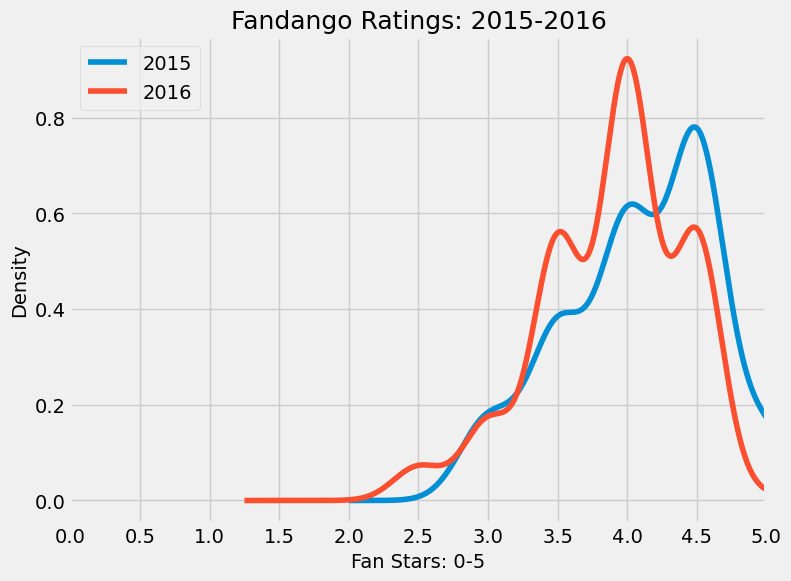

In [32]:
#Create kernel density plot to analyze distribution
plt.style.use('fivethirtyeight')
popular_2015['fandango_stars'].plot.kde(label='2015', legend=True, figsize=(8,6))
popular_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Fandango Ratings: 2015-2016', fontsize=18)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Fan Stars: 0-5', fontsize=14)
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

plt.show()

2015 has more of a left-skewed distribution while 2016 has more of a normal distribution.
The major difference is the average rating in 2015 was 4.5 whereas the average rating in 2016 was 4.0 This is a significant difference and shows that the ratings did change from one year to the next and that the ratings in 2015 were likely rounded up.
The distribution also shows that 2016 had more lower ratings.

### 3.2  Relative Frequency Distribution
To dig a bit further we are going to compare relative frequencies since our datasets contain different numbers of movies (2015=129, 2016=191).

In [33]:
#2015 frequency distribution as %
popular_2015['fandango_stars'].value_counts(normalize=True).sort_index()*100

fandango_stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [34]:
#2016 frequency distribution as %
popular_2016['fandango'].value_counts(normalize=True).sort_index()*100

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

The relative frequency distributions back up our original findings. 2016 had more lower ratings(6.25% more 3.5 ratings) and 2015's largest category is 4.5 ratings versus 2016 at 4.0 ratings. We can also see that the number of 4.5 ratings dropped 13.37% from 2015 to 2016. The frequency distributions are helpful in that they give us percentages for the ratings but they arent as helpful with visualizing the direction of change so let's make a chart.

### 3.3 Direction of Change
To get a more precise picture about the direction of change we will compute the mean, median, and mode of each dataset and then compare them.

In [35]:
#2015
#calculate mean
mean_2015 = popular_2015['fandango_stars'].mean()
#Calculate median
median_2015 = popular_2015['fandango_stars'].median()
#Calculate mode
mode_2015 = max(popular_2015['fandango_stars'].mode())

print('mean=',mean_2015)
print('median=', median_2015)
print('mode=', mode_2015)

mean= 4.0852713178294575
median= 4.0
mode= 4.5


In [36]:
#2016
#Calculate mean
mean_2016 = popular_2016['fandango'].mean()
#Calculate median
median_2016 = popular_2016['fandango'].median()
#Calculate mode
mode_2016 = max(popular_2016['fandango'].mode())

print('mean=',mean_2016)
print('median=',median_2016)
print('mode=',mode_2016)

mean= 3.887434554973822
median= 4.0
mode= 4.0


In [37]:
#Create new dataframe out of summary statistics
summary_df = pd.DataFrame({'2015': [mean_2015, median_2015, mode_2015],
                          '2016': [mean_2016, median_2016, mode_2016]},
                         index = ['mean', 'median', 'mode'])
print(summary_df)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


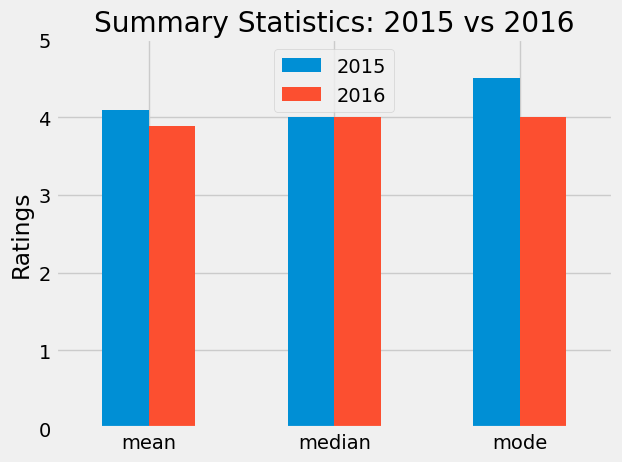

In [38]:
plt.style.use('fivethirtyeight')

summary_df.plot.bar(rot=0)
plt.legend(loc='upper center')
plt.title('Summary Statistics: 2015 vs 2016')
plt.ylabel('Ratings')
plt.ylim(0,5)
plt.show()

We can see that the mean and median stayed about the same and the biggest change was in the mode. This tells us that there was a negative change and also backs up our original information that 2016 had more low ratings.

## 4. Results
Our kernel density plot showed an overall view that ratings have indeed changed from 2015 to 2016. We could see that ratings in 2016 tended to be lower. 

We then looked at the relative frequency distribution of the ratings and found that the number of 4.5 ratings dropped 13.37% from 2015 to 2016. We also learned that the number of lower ratings (3.5) in 2016 grew by 6.25%.

We then created a visualization for the summary statistics of mean, median, and mode and found that the median stayed the same from 2015 to 2016 but 2015 had more high ratings than 2016.

## 5. Conclusion
From our analysis it is clear that the ratings on Fandango in 2016 were lower than they were in 2015. This tells us that there was a problem with the rating system on the backend at Fandango where ratings were rounded up. However, it looks like this problem was fixed in 2016 because we can see that there is a difference between years and 2016 had more lower ratings.